<a href="https://colab.research.google.com/github/lukaslew1501-cmyk/PRA3024/blob/main/GW_tutorial_3_modeled_searches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pycbc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.7/168.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 116.7 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolve

### GW tutorial 3: Generation of data and matched filtering

Author: Melissa Lopez

Email: m.lopez@uu.nl

In [15]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd, pycbc.noise
import pylab
import matplotlib.pyplot as plt
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
import random

Previously, we have plotted the PSD of different detectors. Some PSDs are from previous runs (O3), while some others are the design sensitivity of future detectors.

The PSD characterizes the noise of the detector, so we can generate detector noise accordingly.

**Exercise 1:** Load the `aligo_O4high.txt` PSD to [generate](https://pycbc.org/pycbc/latest/html/pycbc.noise.html#pycbc.noise.gaussian.noise_from_psd) some Gaussian data.

_Hint:_ Minimum frequency is 10 Hz, sampling rate 4096 Hz and we want 20s of duration

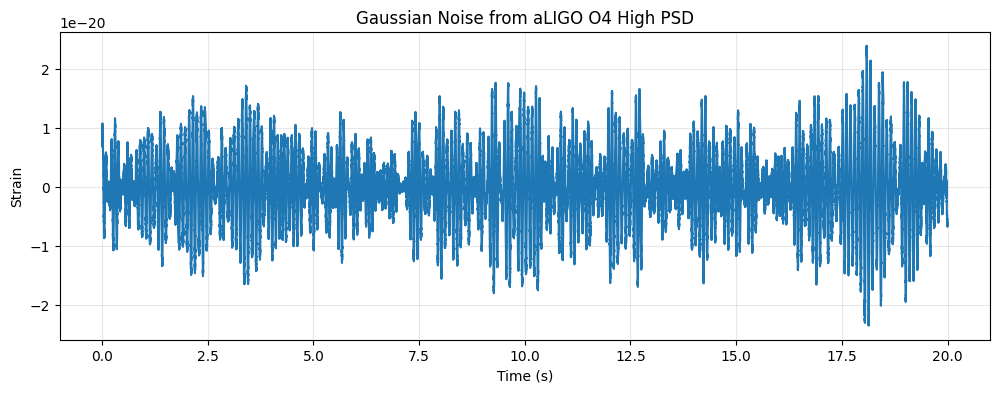

Duration: 20.0 s
Sample rate: 4096.0 Hz
Number of samples: 81920


In [16]:
# Load
# Set low_freq_cutoff to match the file's starting frequency
psd = pycbc.psd.from_txt('aligo_O4high.txt', length=20*4096//2+1,
                          delta_f=1.0/20, low_freq_cutoff=10.22)

# Generate Gaussian noise with the given PSD
delta_t = 1.0/4096  # sampling interval
noise = pycbc.noise.noise_from_psd(length=20*4096, delta_t=delta_t, psd=psd)

# Plot the noise time series
plt.figure(figsize=(12, 4))
plt.plot(noise.sample_times, noise)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gaussian Noise from aLIGO O4 High PSD')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Verify the noise properties
print(f"Duration: {noise.duration} s")
print(f"Sample rate: {1/noise.delta_t} Hz")
print(f"Number of samples: {len(noise)}")

As you can see. the generated noise is "coloured" according to the detector noise. Now, we would like to add a simulated gravitational wave signal in our detector noise.

**Exercise 2:** Using [this function](https://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform) to generate waveforms in time domain, provide the plus and cross polarization of a binary black hole merger of $m_{1} = m_{2} = 50$ at 2000 Mpc. Use the waveform approximant "IMRPhenomD". How does the waveform amplitude compare to the detector noise?

The waveform comes from the source, but it needs to be projected in the detector. [Project](https://pycbc.org/pycbc/latest/html/pycbc.detector.html#pycbc.detector.ground.Detector.project_wave) the waveform on LIGO Livingston (L1) at random sky-location and polarization. You can specify your detector with [this](https://pycbc.org/pycbc/latest/html/pycbc.detector.html#pycbc.detector.ground.Detector) function. How does the waveform change because of this projection?

_Hint:_ Right ascension range is $[0, 2\pi]$, declination is $[-2\pi, 2\pi]$ and polarization is $[0, 2\pi]$.

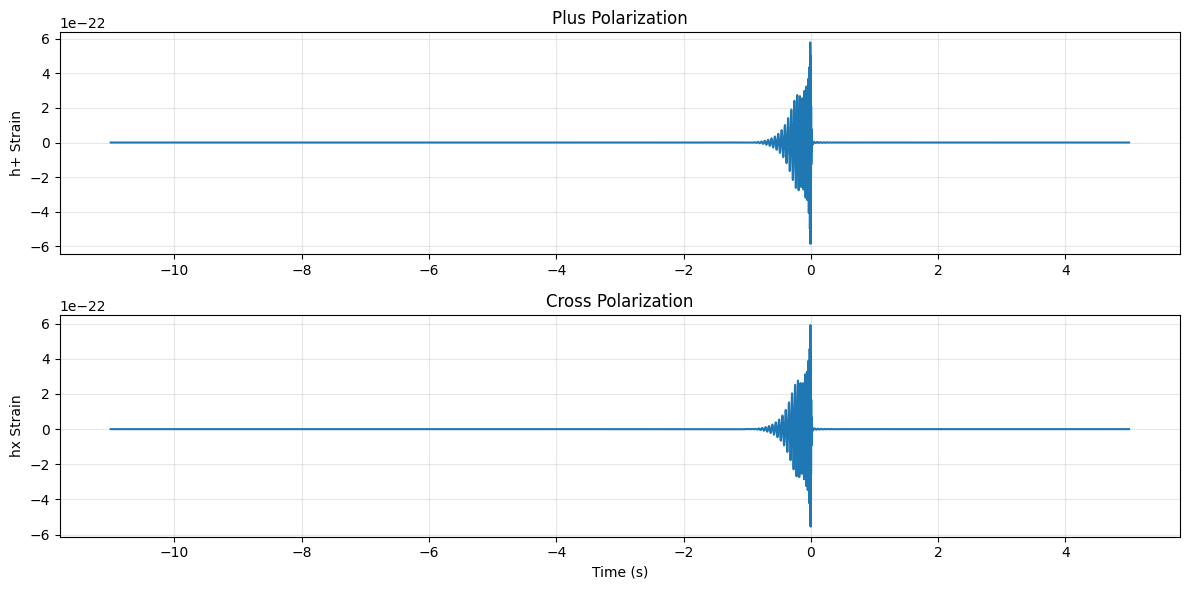

Waveform peak amplitude: ~5.85e-22
Typical noise amplitude: ~6.96e-21
Signal is ~11.9x smaller than noise fluctuations

Random sky location:
Right ascension: 5.616 rad
Declination: -1.291 rad
Polarization: 5.211 rad


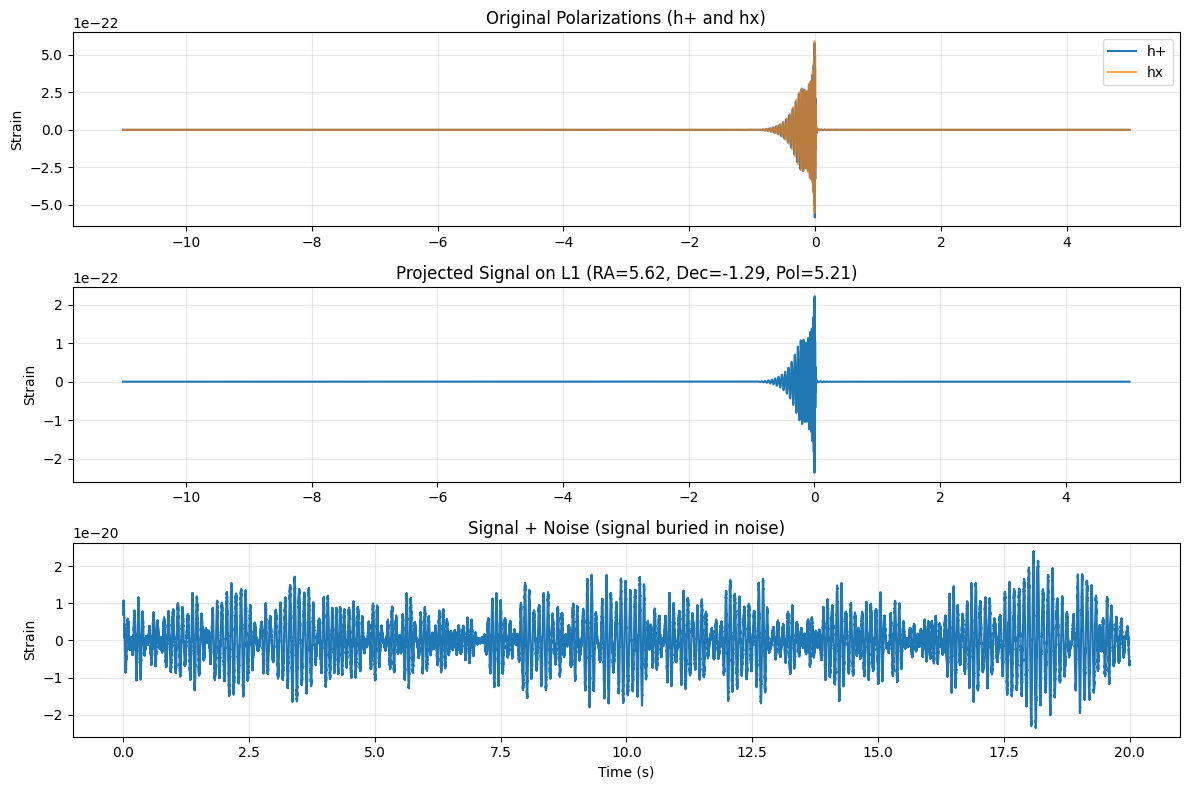


Projected signal peak amplitude: ~2.36e-22


In [17]:
# Part 1: Generate the waveform
hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=50,
                         mass2=50,
                         distance=2000,  # Mpc
                         delta_t=1.0/4096,
                         f_lower=20)

# Plot the plus and cross polarizations
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(hp.sample_times, hp)
plt.ylabel('h+ Strain')
plt.title('Plus Polarization')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(hc.sample_times, hc)
plt.xlabel('Time (s)')
plt.ylabel('hx Strain')
plt.title('Cross Polarization')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Waveform peak amplitude: ~{max(abs(hp.max()), abs(hp.min())):.2e}")
print(f"Typical noise amplitude: ~{np.std(noise):.2e}")
print(f"Signal is ~{np.std(noise)/max(abs(hp.max()), abs(hp.min())):.1f}x smaller than noise fluctuations")

# Part 2: Project onto LIGO Livingston detector
det = Detector('L1')

# Generate random sky location and polarization
ra = random.uniform(0, 2*np.pi)           # Right ascension [0, 2π]
dec = random.uniform(-np.pi/2, np.pi/2)   # Declination [-π/2, π/2]
pol = random.uniform(0, 2*np.pi)          # Polarization [0, 2π]

print(f"\nRandom sky location:")
print(f"Right ascension: {ra:.3f} rad")
print(f"Declination: {dec:.3f} rad")
print(f"Polarization: {pol:.3f} rad")

# Project the waveform
signal = det.project_wave(hp, hc, ra=ra, dec=dec, polarization=pol)

# Compare original polarizations with projected signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(hp.sample_times, hp, label='h+')
plt.plot(hc.sample_times, hc, label='hx', alpha=0.7)
plt.ylabel('Strain')
plt.title('Original Polarizations (h+ and hx)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(signal.sample_times, signal)
plt.ylabel('Strain')
plt.title(f'Projected Signal on L1 (RA={ra:.2f}, Dec={dec:.2f}, Pol={pol:.2f})')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
# Resize and align signal to match noise
signal.resize(len(noise))
signal.start_time = noise.start_time  # Align epochs
data = noise + signal
plt.plot(data.sample_times, data)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Signal + Noise (signal buried in noise)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nProjected signal peak amplitude: ~{max(abs(signal.max()), abs(signal.min())):.2e}")

**Exercise 2:** From before our detector noise is 20s long. Add the GW into noise after 5s. We also need to get the first 4s to estimate the PSD in the next excercise. Make an overlaid plot with the total data, the portion of data where the GW is added and the data needed to estimate the PSD.

_Bonus:_ Can you also plot the GW signal?


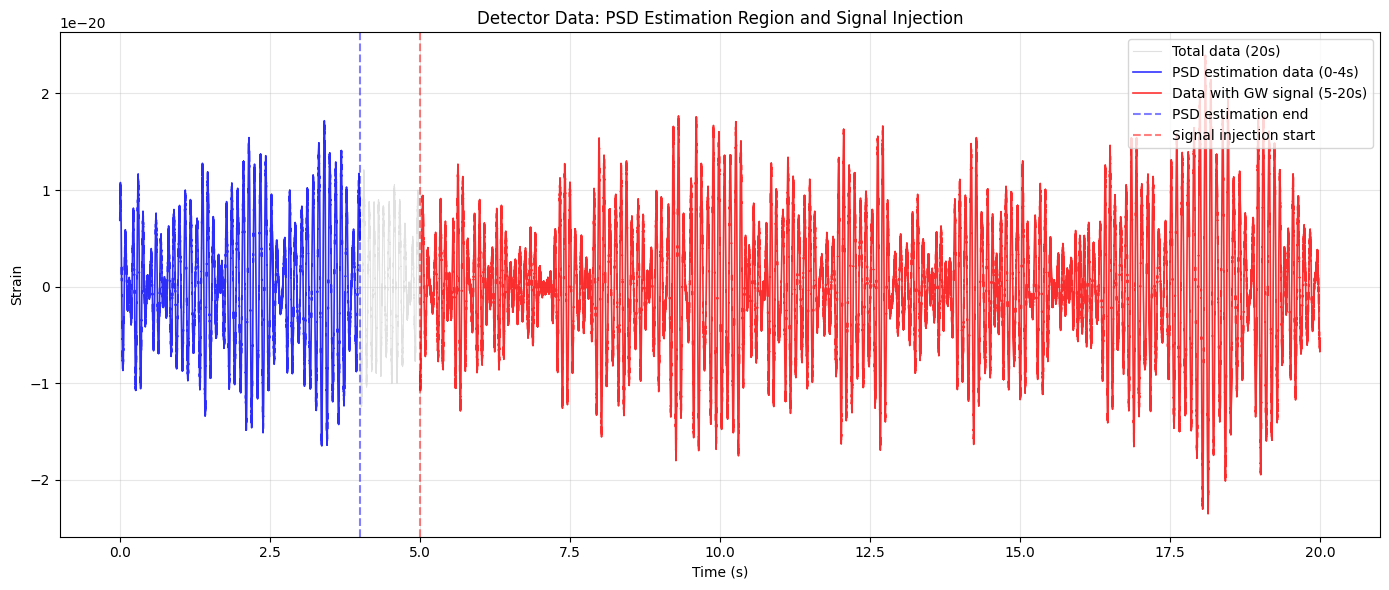

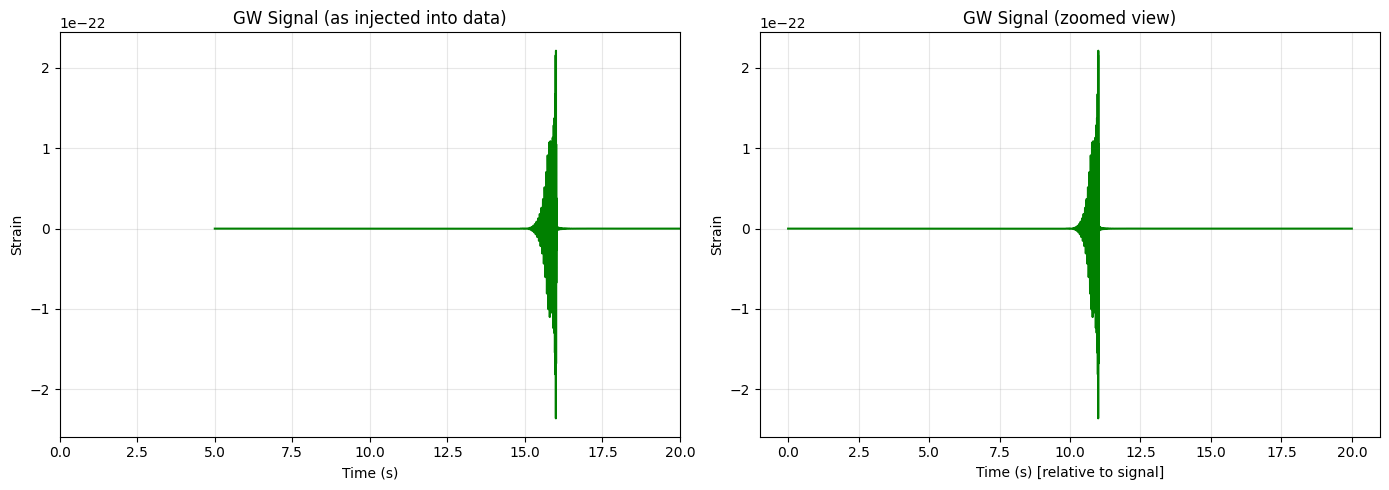

Data summary:
- Total data duration: 20.0 s
- PSD estimation region: 0 - 4 s
- Signal injection time: 5 s
- Signal duration: 20.000 s
- Signal peak amplitude: 2.36e-22
- Noise RMS: 6.96e-21


In [23]:
# Exercise 2: Add GW signal at 5s into the noise

# Create a copy of noise for the data
data = noise.copy()

# Calculate where to insert the signal (at 5s)
insert_time = 5.0
insert_index = int(insert_time / data.delta_t)

# Work with numpy arrays to avoid epoch issues
data_array = np.array(data)
signal_array = np.array(signal)

# Add signal starting at 5s
signal_length = len(signal_array)
if insert_index + signal_length <= len(data_array):
    data_array[insert_index:insert_index + signal_length] += signal_array
else:
    # If signal is too long, truncate it
    remaining_length = len(data_array) - insert_index
    data_array[insert_index:] += signal_array[:remaining_length]

# Define the three regions
psd_estimation_end = 4.0  # First 4s for PSD estimation
signal_start = 5.0        # Signal starts at 5s

# Create time arrays
time = data.sample_times

# Create time masks for plotting
psd_mask = time < psd_estimation_end
signal_mask = time >= signal_start

# Create the overlaid plot
plt.figure(figsize=(14, 6))

# Plot total data
plt.plot(time, data_array, color='lightgray', alpha=0.7, linewidth=0.8, label='Total data (20s)')

# Highlight PSD estimation region (first 4s)
plt.plot(time[psd_mask], data_array[psd_mask], color='blue', linewidth=1.2,
         label='PSD estimation data (0-4s)', alpha=0.8)

# Highlight signal region (after 5s)
plt.plot(time[signal_mask], data_array[signal_mask], color='red', linewidth=1.2,
         label='Data with GW signal (5-20s)', alpha=0.8)

# Add vertical lines to mark boundaries
plt.axvline(x=4.0, color='blue', linestyle='--', alpha=0.5, label='PSD estimation end')
plt.axvline(x=5.0, color='red', linestyle='--', alpha=0.5, label='Signal injection start')

plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Detector Data: PSD Estimation Region and Signal Injection')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# BONUS: Plot the GW signal separately
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# Plot signal aligned to where it appears in the data
signal_times = np.arange(len(signal_array)) * signal.delta_t + signal_start
plt.plot(signal_times, signal_array, color='green', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('GW Signal (as injected into data)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 20)

plt.subplot(1, 2, 2)
# Zoom in on the signal
plt.plot(signal.sample_times, signal_array, color='green', linewidth=1.5)
plt.xlabel('Time (s) [relative to signal]')
plt.ylabel('Strain')
plt.title('GW Signal (zoomed view)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Data summary:")
print(f"- Total data duration: {data.duration} s")
print(f"- PSD estimation region: 0 - 4 s")
print(f"- Signal injection time: 5 s")
print(f"- Signal duration: {len(signal_array) * signal.delta_t:.3f} s")
print(f"- Signal peak amplitude: {max(abs(signal_array.max()), abs(signal_array.min())):.2e}")
print(f"- Noise RMS: {np.std(noise):.2e}")

**Exercise 3:** In a proper search we do not really have the PSD handy. We want to estimate the PSD with Welch's method (see [here](https://ccrma.stanford.edu/~jos/sasp/Welch_s_Method.html) for details), but we want to use the 4s of the beginning where the GW is not present using [this function](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.welch). Plot the estimated PSD. Note that before we used a dummy whitening, and this one is a bit better.

What is the $\Delta_f$ of the estimated PSD? What is $\Delta_f$ of the data we want to whiten to see the GW signal?

_Hint:_ `seg_stride (int)` is usually half of `seg_len`.


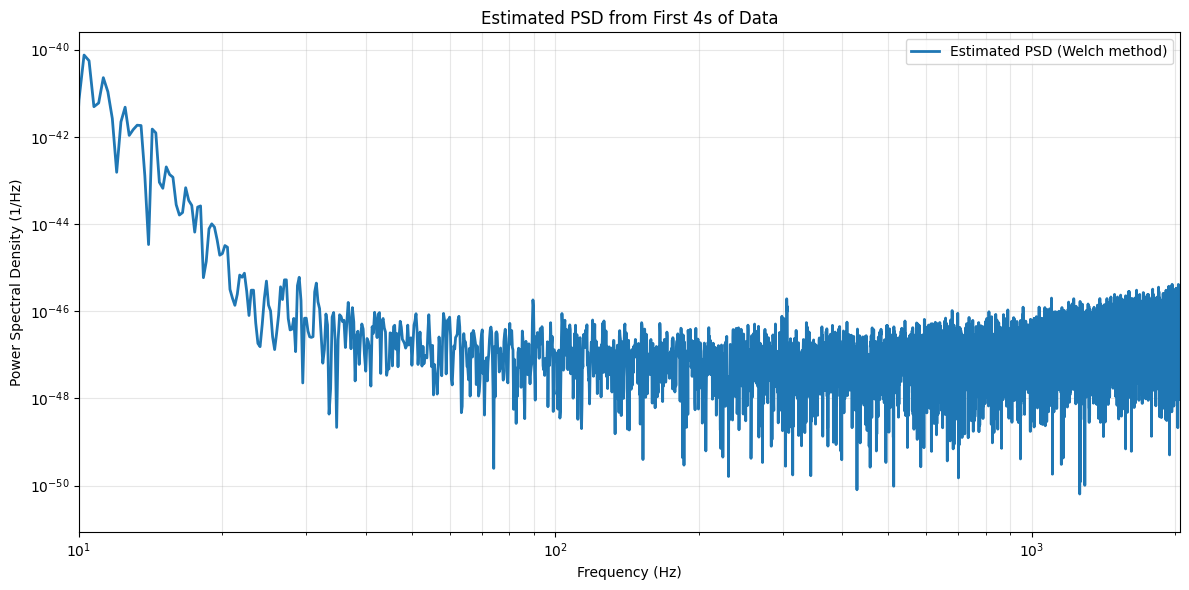

PSD Estimation Summary:
- Segment length: 16384 samples (4.0 s)
- Segment stride: 8192 samples (2.0 s)
- Number of segments used: 1

Frequency Resolution:
- Δf of estimated PSD: 0.2500 Hz
- Δf of data (for whitening): 0.0500 Hz

Comparison:
- PSD has 0.2x coarser frequency resolution than data
- This is because PSD uses 4.0s segments vs 20.0s full data duration


In [19]:
# Exercise 3: Estimate PSD using Welch's method

# Extract the first 4s of data for PSD estimation (where no GW is present)
psd_estimation_duration = 4.0
psd_estimation_samples = int(psd_estimation_duration / data.delta_t)
psd_data = data[:psd_estimation_samples]

# Estimate PSD using Welch's method
# seg_len should be chosen based on desired frequency resolution
# A common choice is 4 seconds worth of samples
seg_len = 4 * 4096  # 4 seconds at 4096 Hz sampling rate
seg_stride = seg_len // 2  # Half of seg_len (50% overlap)

from pycbc.psd import welch

estimated_psd = welch(psd_data,
                      seg_len=seg_len,
                      seg_stride=seg_stride)

# Plot the estimated PSD
plt.figure(figsize=(12, 6))
plt.loglog(estimated_psd.sample_frequencies, estimated_psd,
           label='Estimated PSD (Welch method)', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (1/Hz)')
plt.title('Estimated PSD from First 4s of Data')
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.xlim(10, 2048)
plt.tight_layout()
plt.show()

# Calculate delta_f for estimated PSD and data
delta_f_psd = estimated_psd.delta_f
delta_f_data = 1.0 / data.duration

print(f"PSD Estimation Summary:")
print(f"- Segment length: {seg_len} samples ({seg_len/4096:.1f} s)")
print(f"- Segment stride: {seg_stride} samples ({seg_stride/4096:.1f} s)")
print(f"- Number of segments used: {int((len(psd_data) - seg_len) / seg_stride) + 1}")
print(f"\nFrequency Resolution:")
print(f"- Δf of estimated PSD: {delta_f_psd:.4f} Hz")
print(f"- Δf of data (for whitening): {delta_f_data:.4f} Hz")
print(f"\nComparison:")
print(f"- PSD has {delta_f_data/delta_f_psd:.1f}x coarser frequency resolution than data")
print(f"- This is because PSD uses {seg_len/4096:.1f}s segments vs {data.duration:.1f}s full data duration")

Now that we have the PSD we need to interpolate it to match our data and then limit the filter length of 1 / PSD. After this, we can directly use this PSD to filter the data. Since the data has been highpassed above 12 Hz, and will have low values below this we need to informat the function to not include frequencies below this frequency.

**Exercise 4:** Use the functions [interpolate](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.interpolate) and [inverse_spectrum_truncation](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.estimate.inverse_spectrum_truncation) to achieve a proper formatting of the PSD.

_Hint:_ `max_filter_len (int)` is $4 \times$ sampling_rate. Note that the original PSD has a minimum frequency of 12Hz.

Interpolation:
- Original PSD Δf: 0.2500 Hz
- Interpolated PSD Δf: 0.0500 Hz
- Original PSD length: 8193
- Interpolated PSD length: 40961

Inverse Spectrum Truncation:
- Max filter length: 16384 samples (4.0 s)
- Low frequency cutoff: 12.0 Hz
- Truncated PSD length: 40961


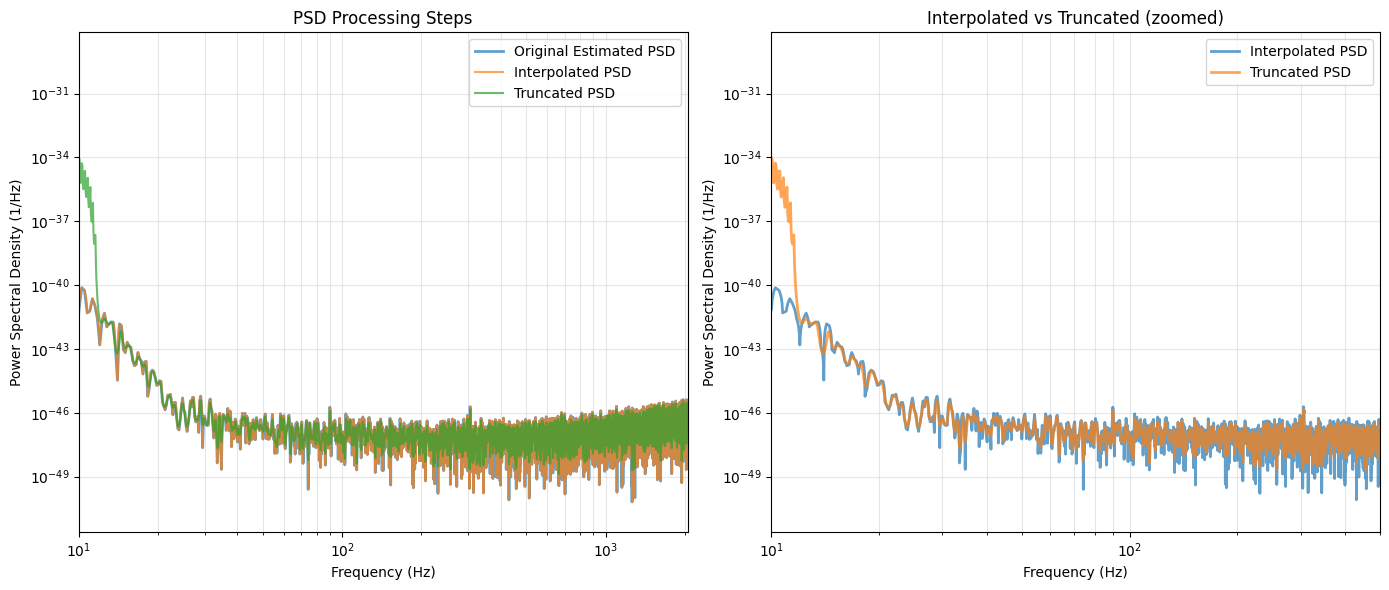


PSD is now ready for whitening the data!


In [20]:
# Exercise 4: Interpolate and format the PSD for filtering

from pycbc.psd import interpolate, inverse_spectrum_truncation

# Step 1: Interpolate the PSD to match the data's frequency resolution
# We need to match the data's delta_f
delta_f_data = 1.0 / data.duration
n_freqs = int(4096 / 2 * data.duration) + 1  # Number of frequency bins for data

interpolated_psd = interpolate(estimated_psd, delta_f_data)

print(f"Interpolation:")
print(f"- Original PSD Δf: {estimated_psd.delta_f:.4f} Hz")
print(f"- Interpolated PSD Δf: {interpolated_psd.delta_f:.4f} Hz")
print(f"- Original PSD length: {len(estimated_psd)}")
print(f"- Interpolated PSD length: {len(interpolated_psd)}")

# Step 2: Apply inverse spectrum truncation to limit filter length
# max_filter_len is 4 × sampling_rate
sampling_rate = 4096
max_filter_len = 4 * sampling_rate
low_frequency_cutoff = 12.0  # Hz (matching the PSD's minimum frequency)

truncated_psd = inverse_spectrum_truncation(interpolated_psd,
                                            max_filter_len=max_filter_len,
                                            low_frequency_cutoff=low_frequency_cutoff,
                                            trunc_method='hann')

print(f"\nInverse Spectrum Truncation:")
print(f"- Max filter length: {max_filter_len} samples ({max_filter_len/sampling_rate:.1f} s)")
print(f"- Low frequency cutoff: {low_frequency_cutoff} Hz")
print(f"- Truncated PSD length: {len(truncated_psd)}")

# Plot comparison of PSDs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.loglog(estimated_psd.sample_frequencies, estimated_psd,
           label='Original Estimated PSD', linewidth=2, alpha=0.7)
plt.loglog(interpolated_psd.sample_frequencies, interpolated_psd,
           label='Interpolated PSD', linewidth=1.5, alpha=0.7)
plt.loglog(truncated_psd.sample_frequencies, truncated_psd,
           label='Truncated PSD', linewidth=1.5, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (1/Hz)')
plt.title('PSD Processing Steps')
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.xlim(10, 2048)

plt.subplot(1, 2, 2)
# Zoom in to see differences
plt.loglog(interpolated_psd.sample_frequencies, interpolated_psd,
           label='Interpolated PSD', linewidth=2, alpha=0.7)
plt.loglog(truncated_psd.sample_frequencies, truncated_psd,
           label='Truncated PSD', linewidth=2, alpha=0.7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (1/Hz)')
plt.title('Interpolated vs Truncated (zoomed)')
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.xlim(10, 500)

plt.tight_layout()
plt.show()

print(f"\nPSD is now ready for whitening the data!")

Now that the PSD is ready, we can whiten the data. Before we used a PyCBC function, but mathematically this is defined as

\begin{equation}
\tilde{d_w}(f) = \tilde{d}(f)/S_{n}^{-1/2}(f)
\end{equation}
where $\tilde{d}$ and $\tilde{d_w}(f)$ are the Fourier transform of the coloured data and whitened data, respectively.

**Exercise 5:** Whiten the data using the interpolated PSD. Crop 5s at the beginning and the end to avoid border effects (_aliasing_) and bandpass it as in the previous exercise. Can you see the GW signal?

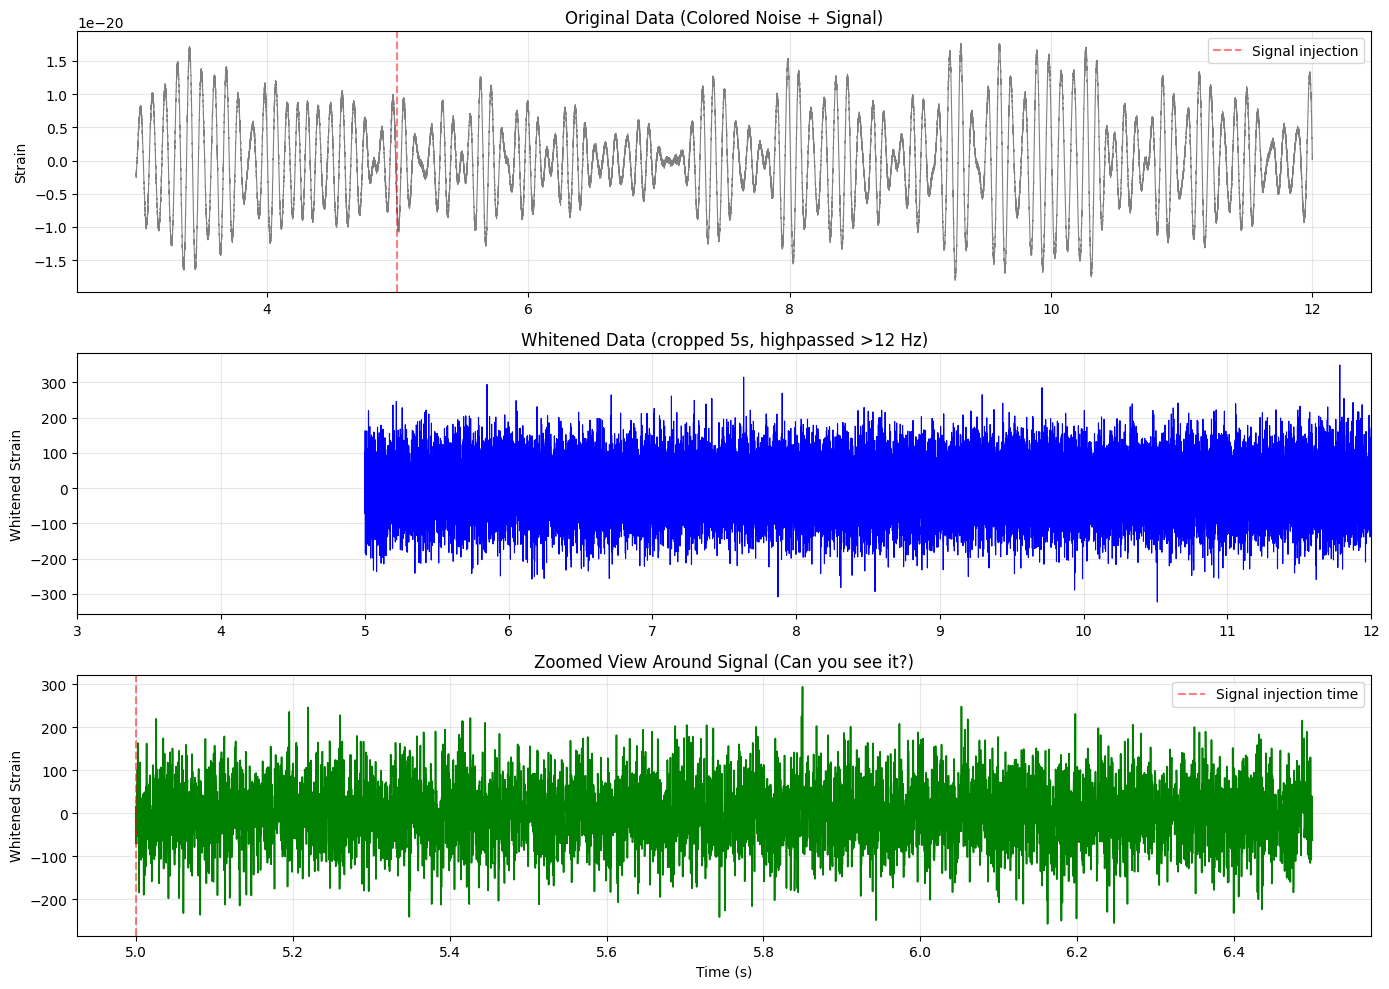

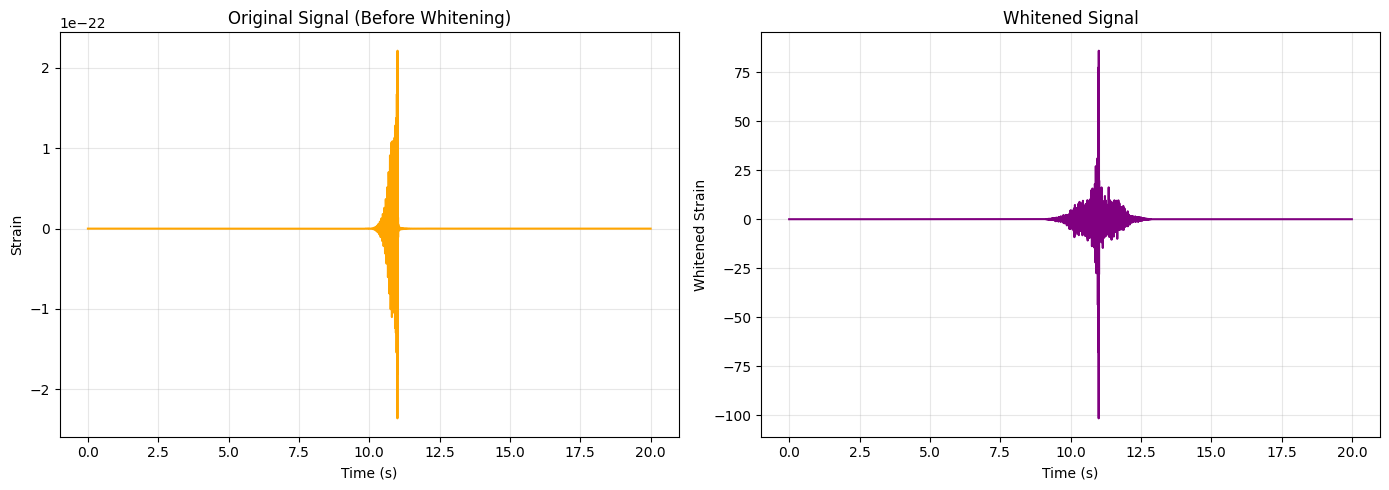


Whitening Summary:
- Original data length: 81920 samples (20.0 s)
- After cropping 5s on each side: 40960 samples (10.0 s)
- Highpass filter cutoff: 12 Hz

Can you see the GW signal? Look around t=5s in the zoomed plot!


In [21]:
# Exercise 5: Whiten the data to reveal the GW signal

from pycbc.filter import highpass

# Step 1: Whiten the data using the truncated PSD
whitened_data = (data.to_frequencyseries() / truncated_psd**0.5).to_timeseries()

# Step 2: Crop 5s at the beginning and end to avoid border effects (aliasing)
crop_duration = 5.0
crop_samples = int(crop_duration / whitened_data.delta_t)
whitened_data_cropped = whitened_data[crop_samples:-crop_samples]

# Step 3: Bandpass (highpass) the data as in previous exercise
# Apply highpass filter at 12 Hz to match the PSD cutoff
whitened_data_filtered = highpass(whitened_data_cropped, frequency=12.0)

# Also whiten and filter the pure signal for comparison
signal_whitened = (signal.to_frequencyseries() / truncated_psd**0.5).to_timeseries()
signal_whitened = highpass(signal_whitened, frequency=12.0)

# Plot the results
plt.figure(figsize=(14, 10))

# Plot 1: Original data (zoomed around signal region)
plt.subplot(3, 1, 1)
time_mask = (time >= 3) & (time <= 12)
plt.plot(time[time_mask], data_array[time_mask], color='gray', linewidth=0.8)
plt.ylabel('Strain')
plt.title('Original Data (Colored Noise + Signal)')
plt.grid(True, alpha=0.3)
plt.axvline(x=5.0, color='red', linestyle='--', alpha=0.5, label='Signal injection')
plt.legend()

# Plot 2: Whitened and filtered data (after cropping)
plt.subplot(3, 1, 2)
plt.plot(whitened_data_filtered.sample_times, whitened_data_filtered,
         color='blue', linewidth=0.8)
plt.ylabel('Whitened Strain')
plt.title('Whitened Data (cropped 5s, highpassed >12 Hz)')
plt.grid(True, alpha=0.3)
plt.xlim(3, 12)

# Plot 3: Zoomed view around the signal
plt.subplot(3, 1, 3)
signal_time_mask = (whitened_data_filtered.sample_times >= 4.5) & \
                   (whitened_data_filtered.sample_times <= 6.5)
plt.plot(whitened_data_filtered.sample_times[signal_time_mask],
         whitened_data_filtered[signal_time_mask],
         color='green', linewidth=1.2)
plt.ylabel('Whitened Strain')
plt.xlabel('Time (s)')
plt.title('Zoomed View Around Signal (Can you see it?)')
plt.grid(True, alpha=0.3)
plt.axvline(x=5.0, color='red', linestyle='--', alpha=0.5, label='Signal injection time')
plt.legend()

plt.tight_layout()
plt.show()

# Additional plot: Compare whitened signal alone
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(signal.sample_times, signal_array, color='orange', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Original Signal (Before Whitening)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(signal_whitened.sample_times, signal_whitened, color='purple', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Whitened Strain')
plt.title('Whitened Signal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nWhitening Summary:")
print(f"- Original data length: {len(data)} samples ({data.duration} s)")
print(f"- After cropping 5s on each side: {len(whitened_data_filtered)} samples ({whitened_data_filtered.duration:.1f} s)")
print(f"- Highpass filter cutoff: 12 Hz")
print(f"\nCan you see the GW signal? Look around t=5s in the zoomed plot!")

So far, we buried a GW signal  $h(t)$ in stationary and Gaussian noise $n(t)$ with zero mean, such that $s(t) = h(t) + n(t)$. Given the optimal filter  $K(t)$,

\begin{equation}
\label{eq:filteredsignal}
\hat{s} = \int_{-\infty}^{\infty}  K(t)s(t) dt = \int_{-\infty}^{\infty} \tilde{K}(f)^{*}\tilde{s}(f) df, \quad \text{ where }  \tilde{s}(f) = \int_{-\infty}^{\infty} s(t)e^{-2 \pi i ft}dt
\end{equation}
where $\hat{s}$ is the filtered value of $s(t)$, $^*$ represents the complex conjugate, and $\tilde{\cdot }\ $ the Fourier transform.

The detection statistic that is maximised by the optimal filter $K(t)$  will be the SNR, defined as $\rho = S/N$. $S$ is the expected value of $\hat{s}$ when $h(t) \neq 0$, while $N$ is the squared root of the noise variance when $h(t) =0$. It can be demonstrated that the optimal filter $K(t)$ is the model of the GW signal itself, known as _template_.

The fundamental modelled detection technique is called "matched filtering", since the filter function is chosen to "match" the signal we are looking for. We can write the SNR between an unknown time series $s(t)$ and the template $h_{m}$ as

\begin{equation}
\label{eq:wienerscalar}
\rho =  4 \text{Re} \int_{0}^{\infty} \frac{\tilde{s}^{*}(f)}{S_{n}(f)} \tilde{h_{m}}(f) df.
\end{equation}



**Exercise 6:** Use the [matched_filter](https://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.matchedfilter.matched_filter) function to filter the coloured data with the template. Crop the SNR time series 5s at each side and plot it together with the whitened data. Where is the GW signal? Note that the y-axis of the whitened data is _amplitude_ and the y-axis of the SNR timeseries is _SNR_.

How much is the maximum of the absolute value of the SNR time series? If it is larger than 5 it will generate a "trigger" for further analysis. Will the trigger be generated?

Note that the parameter space of GW signals is vast, so to find these signals, we will need to create a template bank and do this process for thousands of templates. Then, this becomes a high-performance computing problem!

_Hint_: you need to [resize](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.array.Array.resize) the template and use [cyclic_time_shift](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.frequencyseries.FrequencySeries.cyclic_time_shift)


Matched Filtering Results:
Maximum SNR: 142.61
Time of maximum SNR: 9.000 s
Expected signal time: ~5.0 s

Trigger threshold: SNR > 5
Will trigger be generated? YES


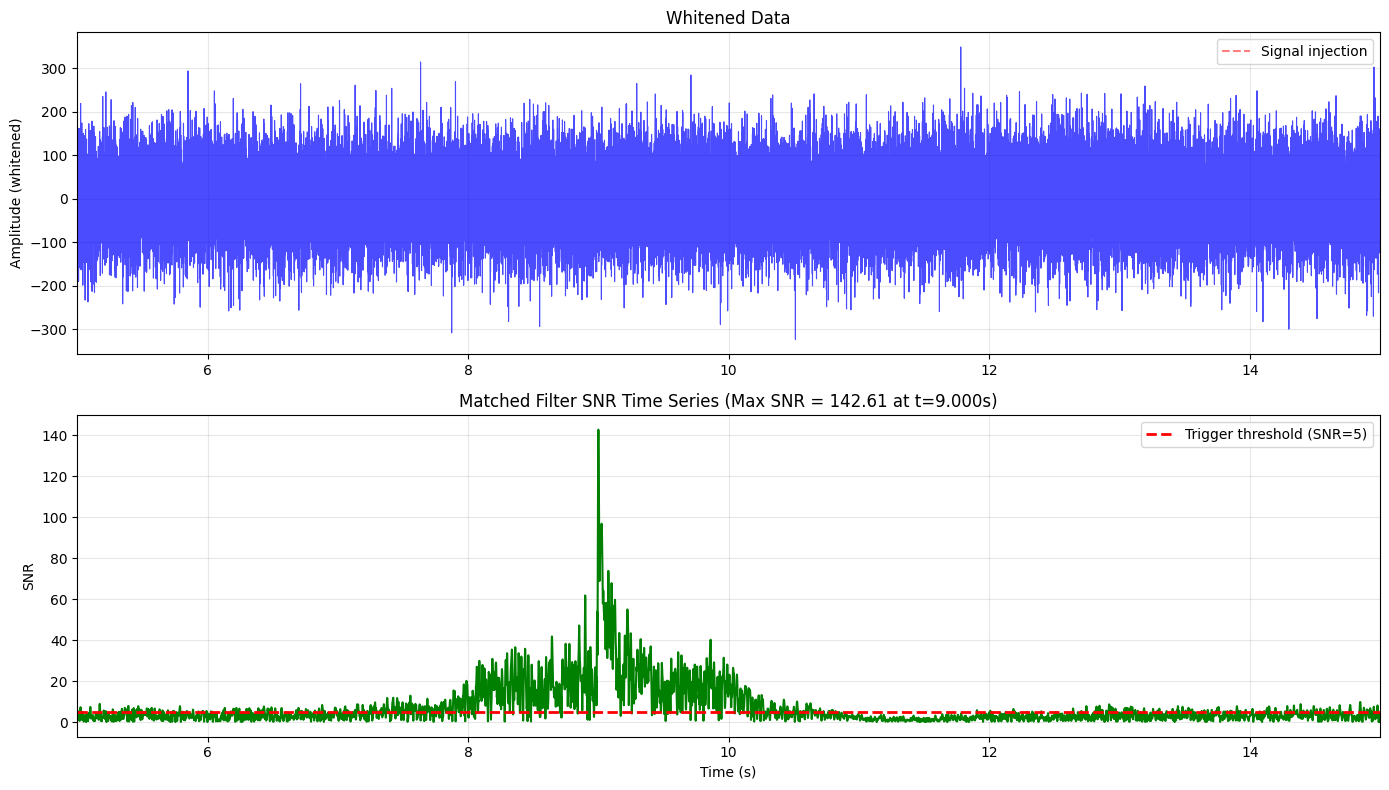

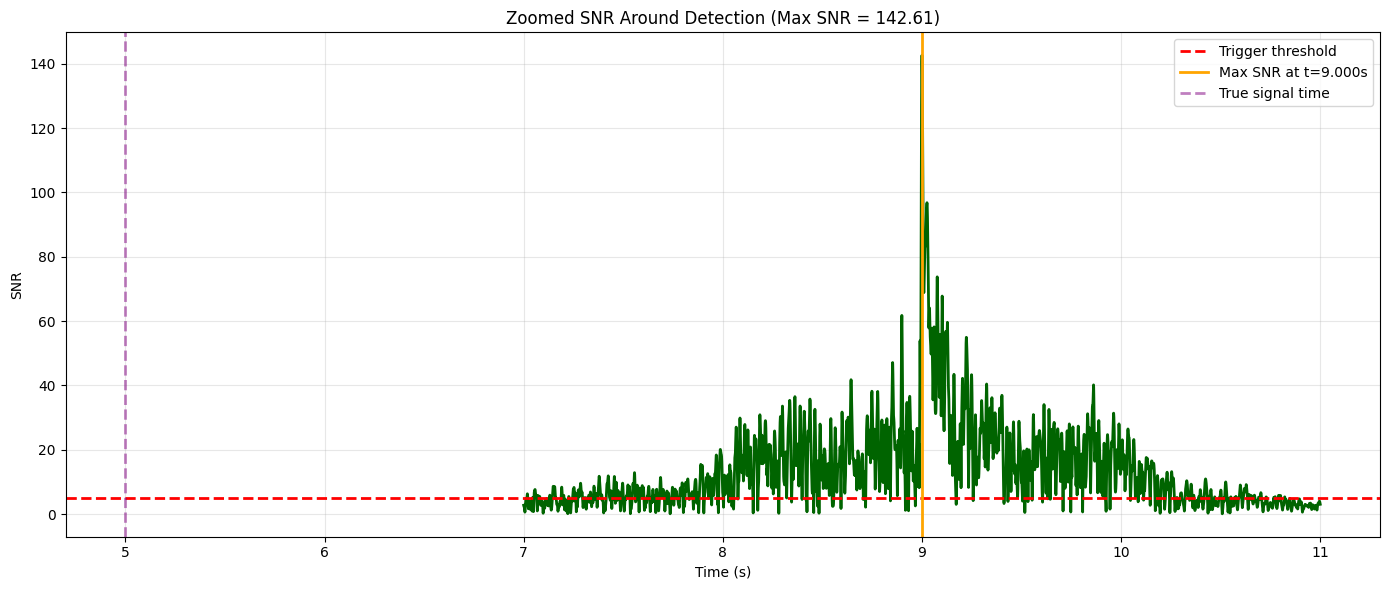

In [25]:
# Exercise 6: Matched filtering to detect the GW signal

from pycbc.filter import matched_filter

# Step 1: Generate the template (we'll use the same signal parameters we injected)
# In reality, we'd search over many templates with different parameters
template_hp, template_hc = get_td_waveform(approximant="IMRPhenomD",
                                           mass1=50,
                                           mass2=50,
                                           distance=2000,
                                           delta_t=1.0/4096,
                                           f_lower=20)

# Project template onto detector (same detector as our data)
det = Detector('L1')
template = det.project_wave(template_hp, template_hc,
                           ra=ra, dec=dec, polarization=pol)

# Step 2: Resize template to match data length and align times
template.resize(len(data))
from pycbc.filter import resample_to_delta_t, highpass_fir
from pycbc.types import TimeSeries

# Make sure template has same properties as data
template_aligned = TimeSeries(template, delta_t=data.delta_t, epoch=data.start_time)

# Step 3: Perform matched filtering
# This computes the SNR time series
snr = matched_filter(template_aligned, data, psd=truncated_psd,
                     low_frequency_cutoff=12.0)

# Step 4: Crop SNR time series 5s at each side to avoid edge effects
crop_samples = int(5.0 / snr.delta_t)
snr_cropped = snr[crop_samples:-crop_samples]

# Find the maximum SNR
max_snr = abs(snr_cropped).numpy().max()
max_snr_time = snr_cropped.sample_times[abs(snr_cropped).numpy().argmax()]

print(f"\nMatched Filtering Results:")
print(f"Maximum SNR: {max_snr:.2f}")
print(f"Time of maximum SNR: {max_snr_time:.3f} s")
print(f"Expected signal time: ~5.0 s")
print(f"\nTrigger threshold: SNR > 5")
print(f"Will trigger be generated? {'YES' if max_snr > 5 else 'NO'}")

# Step 5: Plot whitened data and SNR time series together
plt.figure(figsize=(14, 8))

# Plot 1: Whitened data
plt.subplot(2, 1, 1)
plt.plot(whitened_data_filtered.sample_times, whitened_data_filtered,
         color='blue', linewidth=0.8, alpha=0.7)
plt.ylabel('Amplitude (whitened)')
plt.title('Whitened Data')
plt.grid(True, alpha=0.3)
plt.xlim(whitened_data_filtered.sample_times[0], whitened_data_filtered.sample_times[-1])
plt.axvline(x=5.0, color='red', linestyle='--', alpha=0.5, label='Signal injection')
plt.legend()

# Plot 2: SNR time series
plt.subplot(2, 1, 2)
plt.plot(snr_cropped.sample_times, abs(snr_cropped),
         color='green', linewidth=1.5)
plt.axhline(y=5, color='red', linestyle='--', linewidth=2,
            label='Trigger threshold (SNR=5)')
plt.ylabel('SNR')
plt.xlabel('Time (s)')
plt.title(f'Matched Filter SNR Time Series (Max SNR = {max_snr:.2f} at t={max_snr_time:.3f}s)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(snr_cropped.sample_times[0], snr_cropped.sample_times[-1])

plt.tight_layout()
plt.show()

# Zoomed plot around the signal
plt.figure(figsize=(14, 6))
zoom_start = max(3.0, max_snr_time - 2)
zoom_end = min(max_snr_time + 2, snr_cropped.sample_times[-1])
zoom_mask = (snr_cropped.sample_times >= zoom_start) & (snr_cropped.sample_times <= zoom_end)

plt.plot(snr_cropped.sample_times[zoom_mask], abs(snr_cropped)[zoom_mask],
         color='darkgreen', linewidth=2)
plt.axhline(y=5, color='red', linestyle='--', linewidth=2, label='Trigger threshold')
plt.axvline(x=max_snr_time, color='orange', linestyle='-', linewidth=2,
            label=f'Max SNR at t={max_snr_time:.3f}s')
plt.axvline(x=5.0, color='purple', linestyle='--', linewidth=2, alpha=0.5,
            label='True signal time')
plt.ylabel('SNR')
plt.xlabel('Time (s)')
plt.title(f'Zoomed SNR Around Detection (Max SNR = {max_snr:.2f})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Good job arriving at the end of the tutorial! This was a small peek at GW data analysis that I hope you found interesting.

There is a bonus track exercise if you are bored, but we can also have a chat about some more GW data analysis if you prefer.